In [2]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
import math

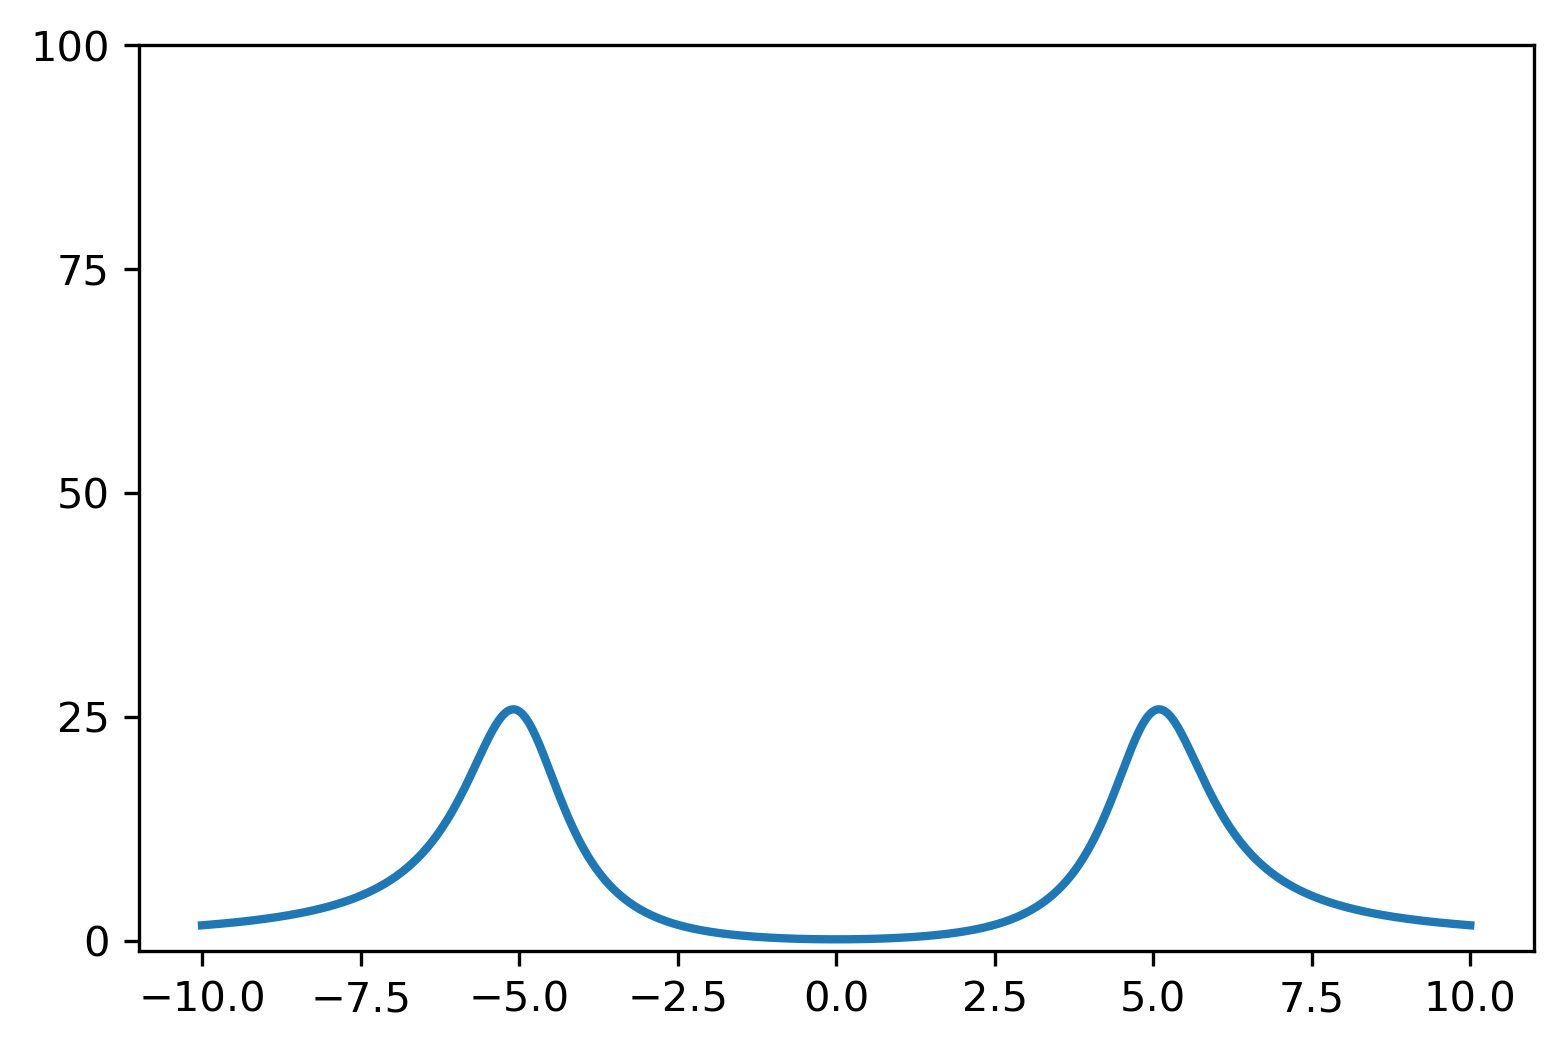

In [5]:
#DIMENSÃO DO SISTEMA#
N = 7  #Dimensão do espaço de Hilbert da cavidade
NA = 1 #Número de átomos
idatomA = qeye(2) #Operador identidade do átomo A
ida = qeye(N) #Operador identidade do campo
M = N*2^(NA) #Dimensão total do sistema átomo-campo
nloop = 1000 #Número de passos em DeltaP

#PARÂMETROS DO HAMILTONIANO#
kappa = 1#Decaimento da cavidade
g = 5*kappa #Acoplamento átomo-campo (transição atômica 1<->3
E = 0.1*kappa #Campo de prova
D = 0*kappa #Dessintonia entre átomo e cavidade (w0-wp)
Dp = 10.0*kappa #Variação de DP -> Dessintonia entre modo da cavidade e campo de prova
DpList= np.linspace(-Dp,Dp,nloop) #Divisão dos passos

#PARÂMETROS DA EQUAÇÃO MESTRA - Taxa de decaimento e dissipação#
Gamma21 =1#Taxa de decaimento 2 -> 1
gamma2 = 0.0 #Taxa de defasagem - level 2

#OPERADORES ATÔMICOS#
#|1> =  estado fundamental e |2> = estado excitado. base {1,2}
#S12 = |1><2|, S21 = S12'
s1=Qobj([[1],[0]])
s2=Qobj([[0],[1]])
s12 =s1*s2.dag()

#Átomo A#
S12A = tensor(ida,s12) #sigma12
S11A = S12A*S12A.dag() #sigma11
S22A = S12A.dag()*S12A #sigma22
#S11A = tensor(qeye(N), basis(2,0)*basis(2,0).dag())
#S22A = tensor(qeye(N), basis(2,1)*basis(2,1).dag())
#S12A = tensor(qeye(N), basis(2,0)*basis(2,1).dag())

#OPERADORES DO MODO DA CAVIDADE#
a=tensor(destroy(N),idatomA);

#EQUAÇÃO MESTRA = ÁTOMO DE 2 NÍVEIS + MODO DA CAVIDADE#

# Colapse Operators
C1 = math.sqrt(2*kappa)*a      #cavity mode 
C21 = math.sqrt(2*Gamma21)*S12A #decaimento atomA 21
C22 = math.sqrt(2*gamma2)*S22A  #defasagem
C_list = [C1, C21, C22]

#HAMILTONIANO# 

H1 = g*S12A.dag()*a + g*a.dag()*S12A + E*a + E*a.dag() #Hamiltoniano independente de Dp

#SIMULAÇÃO#
T=[]
for k in range(0,nloop):
    DPa=DpList[k] #passos
    H= (DPa-D)*S22A+DPa*(a.dag()*a) + H1 #Hamiltoniano total
    rhoss=steadystate(H, C_list) #Retorna a matriz densidade representando o estado estacionário do Liouviliano (eu espero)
    Transmiss= expect(a.dag()*a, rhoss)/((E/kappa)**2) #Transmissão normalizada
    Tr= Transmiss.real*100
    T+=[Tr]
    
    #PLOT#
plt.figure(1, dpi=300)
plt.plot(DpList,T, linewidth=2 )
plt.yticks([0,25,50,75,100])
plt.savefig('teste.png', format='png')
